In [30]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
# import scipy
plt.rcParams["text.usetex"] = False

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
    "text.latex.preamble": r"\usepackage{amsmath}"
})

In [31]:
df = pd.read_csv('runtime_tokendata_benchmarks.csv')
# df = df[~df['Problem Name'].str.contains('wikipedia')]

In [32]:
df

,Problem Name,Implementation,Completion Token,Prompt Tokens,Total Tokens,Cost,Total Runtime,Total LLM Time,Total Non LLM Time
0,translation,DSPy,54,320,374,0.002410,6.458436,5.124310,1.334126
1,translation,MTLLM,4,170,174,0.000910,1.540778,0.904846,0.635932
2,essay_reviewer,DSPy,732,1408,2140,0.018020,16.006232,14.883144,1.123088
3,essay_reviewer,MTLLM,216,1387,1603,0.010175,9.717227,9.068518,0.648709
4,joke_gen,DSPy,61,193,254,0.001880,4.707879,4.692913,0.014966
5,joke_gen,MTLLM,19,161,180,0.001090,0.851867,0.801474,0.050393
6,expert_answer,DSPy,153,111,264,0.002850,7.111420,7.101864,0.009555
7,expert_answer,MTLLM,110,274,384,0.003020,3.085123,3.028285,0.056839
8,odd_word_out,DSPy,287,542,829,0.007015,8.989907,8.975601,0.014306
9,odd_word_out,MTLLM,25,228,253,0.001515,0.947746,0.884385,0.063362


In [33]:
# Define the new row as a dictionary
new_row_1 = pd.DataFrame({
    'Problem Name': ['math_problem'],
    'Implementation': ['DSPy'],
    'Completion Token': [294],
    'Prompt Tokens': [262],
    'Total Tokens': [294 + 262],	
    'Cost': [(294*10+262*2.5)/1000000],
    'Total Runtime': [2.627395],
    'Total LLM Time': [0],
    'Total Non LLM Time': [0]
})

# Append the new row to the DataFrame
# df = pd.concat([df, new_row], ignore_index=True)

In [34]:
# Define the new row as a dictionary
new_row_2 = pd.DataFrame({
    'Problem Name': ['math_problem'],
    'Implementation': ['MTLLM'],
    'Completion Token': [55],
    'Prompt Tokens': [178],
    'Total Tokens': [55 + 178],	
    'Cost': [(55*10+178*2.5)/1000000],
    'Total Runtime': [2.836329],
    'Total LLM Time': [0],
    'Total Non LLM Time': [0]
})

# Append the new row to the DataFrame
df = pd.concat([new_row_1,new_row_2,df], ignore_index=True)

In [35]:
df

,Problem Name,Implementation,Completion Token,Prompt Tokens,Total Tokens,Cost,Total Runtime,Total LLM Time,Total Non LLM Time
0,math_problem,DSPy,294,262,556,0.003595,2.627395,0.000000,0.000000
1,math_problem,MTLLM,55,178,233,0.000995,2.836329,0.000000,0.000000
2,translation,DSPy,54,320,374,0.002410,6.458436,5.124310,1.334126
3,translation,MTLLM,4,170,174,0.000910,1.540778,0.904846,0.635932
4,essay_reviewer,DSPy,732,1408,2140,0.018020,16.006232,14.883144,1.123088
5,essay_reviewer,MTLLM,216,1387,1603,0.010175,9.717227,9.068518,0.648709
6,joke_gen,DSPy,61,193,254,0.001880,4.707879,4.692913,0.014966
7,joke_gen,MTLLM,19,161,180,0.001090,0.851867,0.801474,0.050393
8,expert_answer,DSPy,153,111,264,0.002850,7.111420,7.101864,0.009555
9,expert_answer,MTLLM,110,274,384,0.003020,3.085123,3.028285,0.056839


In [36]:
df.at[24, 'Total Runtime'] = 10.147
df.at[24, 'Completion Token'] = 508
df.at[24, 'Prompt Tokens'] = 2285
df.at[24, 'Total Tokens'] = 2285+508
df.at[24, 'Cost'] = (508*10+2285*2.5)/1000000
df

,Problem Name,Implementation,Completion Token,Prompt Tokens,Total Tokens,Cost,Total Runtime,Total LLM Time,Total Non LLM Time
0,math_problem,DSPy,294,262,556,0.003595,2.627395,0.000000,0.000000
1,math_problem,MTLLM,55,178,233,0.000995,2.836329,0.000000,0.000000
2,translation,DSPy,54,320,374,0.002410,6.458436,5.124310,1.334126
3,translation,MTLLM,4,170,174,0.000910,1.540778,0.904846,0.635932
4,essay_reviewer,DSPy,732,1408,2140,0.018020,16.006232,14.883144,1.123088
5,essay_reviewer,MTLLM,216,1387,1603,0.010175,9.717227,9.068518,0.648709
6,joke_gen,DSPy,61,193,254,0.001880,4.707879,4.692913,0.014966
7,joke_gen,MTLLM,19,161,180,0.001090,0.851867,0.801474,0.050393
8,expert_answer,DSPy,153,111,264,0.002850,7.111420,7.101864,0.009555
9,expert_answer,MTLLM,110,274,384,0.003020,3.085123,3.028285,0.056839


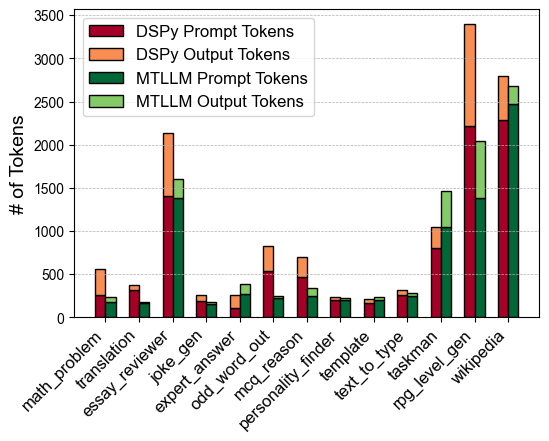

In [37]:
plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial"]

problems = df['Problem Name'].unique()
implementations = df['Implementation'].unique()

data = {}
for problem in problems:
    data[problem] = df[df['Problem Name'] == problem]

# Number of bars per problem
n_bars = len(implementations)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Bar width and bar positions
bar_width = 0.3
bar_positions = np.arange(len(problems))


# Plotting each implementation
for i, implementation in enumerate(implementations):
    prompt_tokens = [data[problem][data[problem]['Implementation'] == implementation]['Prompt Tokens'].values[0] for problem in problems]
    completion_tokens = [data[problem][data[problem]['Implementation'] == implementation]['Completion Token'].values[0] for problem in problems]
    bottom_tokens = [0] * len(problems)
    
    cmap = plt.get_cmap('RdYlGn')

    if implementation == 'DSPy':
        prompt_color = cmap(0.0)
        completion_color = cmap(0.25)
    else :
        prompt_color = cmap(1.0)
        completion_color = cmap(0.75)

    ax.bar(bar_positions + i * bar_width, prompt_tokens, bar_width, label=f'{implementation} Prompt Tokens', color = prompt_color, edgecolor='black')
    ax.bar(bar_positions + i * bar_width, completion_tokens, bar_width, bottom=prompt_tokens, label=f'{implementation} Output Tokens', color = completion_color,edgecolor='black')

# Set x-ticks and labels
ax.set_xticks(bar_positions + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(problems, rotation=45, ha='right', fontsize=12)

# Set labels and title
ax.set_ylabel('# of Tokens', fontsize=14)
# ax.set_title('Token Usage by Problem and Implementation')
ax.legend(fontsize=12, ncol=1)

plt.grid(axis='y',linestyle='--', linewidth=0.5)
plt.savefig('token_usage_benchmarks.pdf', bbox_inches='tight')
plt.show()

[2.627395, 6.458436, 16.006232, 4.707879, 7.11142, 8.989907, 4.060738, 1.221893, 1.315861, 1.150345, 6.495577, 19.96269, 10.147]
[2.836329, 1.540778, 9.717227, 0.851867, 3.085123, 0.947746, 2.071618, 2.069936, 1.095968, 1.449874, 13.527589, 13.501024, 9.544759]


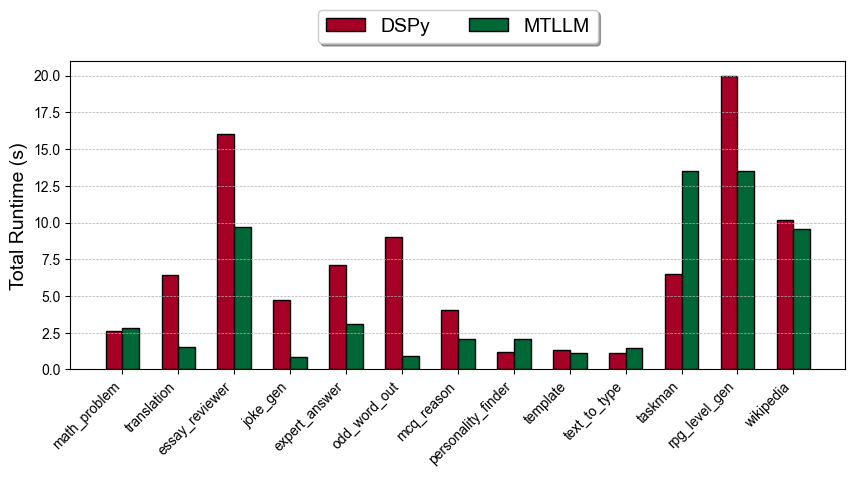

In [38]:
# Number of bars per problem
n_bars = len(implementations)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Bar width and bar positions
bar_width = 0.3
bar_positions = np.arange(len(problems))

# Plotting each implementation
for i, implementation in enumerate(implementations):
    total_runtime = [data[problem][data[problem]['Implementation'] == implementation]['Total Runtime'].values[0] for problem in problems]
    print(total_runtime)
    bottom_tokens = [0] * len(problems)
    cmap = plt.get_cmap('RdYlGn')
    if implementation == 'DSPy':
        runtime_color = cmap(0.0) 
    if implementation == 'MTLLM':
        runtime_color = cmap(1.0)
        
    ax.bar(bar_positions + i * bar_width, total_runtime, bar_width, label=f'{implementation}',color = runtime_color, edgecolor='black')

# Set x-ticks and labels
ax.set_xticks(bar_positions + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(problems, rotation=45, ha='right')

# Set labels and title
ax.set_ylabel('Total Runtime (s)', fontsize=14)
# ax.set_title('Total Runtime by Problem and Implementation')
ax.legend(loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.2), ncol=3)
ax.set_xlabel("")

plt.grid(axis='y',linestyle='--', linewidth=0.5)
plt.savefig('runtime_benchmarks.pdf', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/c_/hm8lg21n1h5d5pltsc86x1j00000gn/T/ipykernel_51169/4144968015.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha='right')
/var/folders/c_/hm8lg21n1h5d5pltsc86x1j00000gn/T/ipykernel_51169/4144968015.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(custom_labels)  # Set new y-tick labels


Text(0, 0.0, '0')


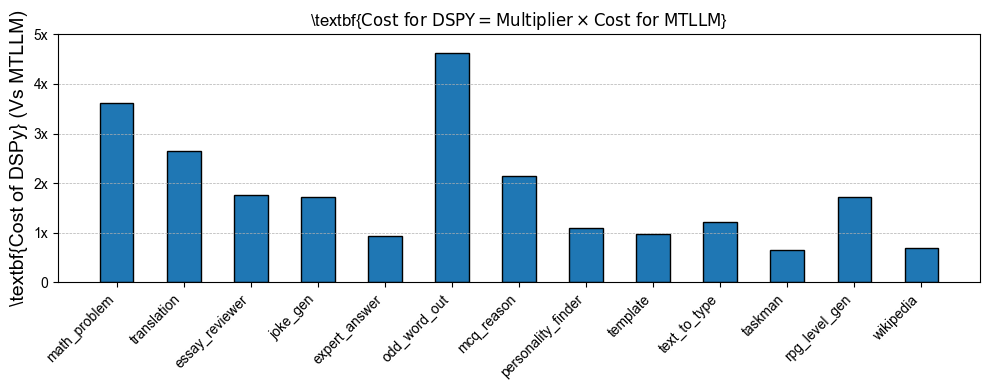

In [39]:
# Pivot the DataFrame to have Problem Name as index and Implementation as columns
df_pivot = df.pivot(index="Problem Name", columns="Implementation", values="Cost")
benchmarks = df['Problem Name'].unique()
df_pivot = df_pivot.reindex(benchmarks)

# Compute the cost difference (DSPy - MTLLM)
df_pivot['Cost Difference'] = ((df_pivot['DSPy'] ) / df_pivot['MTLLM'])
# df_pivot['Cost Difference'] = ((df_pivot['DSPy'] - df_pivot['MTLLM']) / df_pivot['DSPy']) *100

# Normalize the cost difference for coloring
norm = plt.Normalize(df_pivot['Cost Difference'].min(), df_pivot['Cost Difference'].max())
colors = plt.cm.RdYlGn(norm(df_pivot['Cost Difference']))

# Plotting
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(df_pivot.index, df_pivot['Cost Difference'], edgecolor='black', linewidth=1.0, width=0.5)

# for i,bar in enumerate(bars):
#     if df_pivot['Cost Difference'][df_pivot.index[i]] >= 1 :
#         bar.set_facecolor(plt.cm.RdYlGn(0.0))
#     else :
#         bar.set_facecolor(plt.cm.RdYlGn(1.0))

ax.set_ylim(0,5)
ax.set_title(r'\textbf{$ \text{Cost for DSPY} = \text{Multiplier} \times \text{Cost for MTLLM} $}')
ax.set_xlabel('')
ax.set_ylabel(r'\textbf{Cost of DSPy} (Vs MTLLM)', fontsize=14)
ax.set_xticklabels(df_pivot.index, rotation=45, ha='right')
y_ticks = ax.get_yticks()  # Get current y-tick locations
custom_labels = [(f'{int(i)}x' if int(i)!=0 else 0) for i in (y_ticks)]  # Create custom labels

ax.set_yticklabels(custom_labels)  # Set new y-tick labels
ylabels = ax.get_yticklabels()
print(ylabels[0])
ax.grid(axis='y')

plt.grid(axis='y',linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.savefig('cost_benchmarks.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
df_pivot_cost = df.pivot(index="Problem Name", columns="Implementation", values="Cost")
df_pivot_cost = df_pivot_cost.reindex(benchmarks)
df_pivot_cost['Cost Difference'] = df_pivot_cost['DSPy'] / df_pivot_cost['MTLLM']
df_pivot_runtime = df.pivot(index="Problem Name", columns="Implementation", values="Total Runtime")
df_pivot_runtime = df_pivot_runtime.reindex(benchmarks)
df_pivot_runtime['Runtime Difference'] = df_pivot_runtime['DSPy'] / df_pivot_runtime['MTLLM']

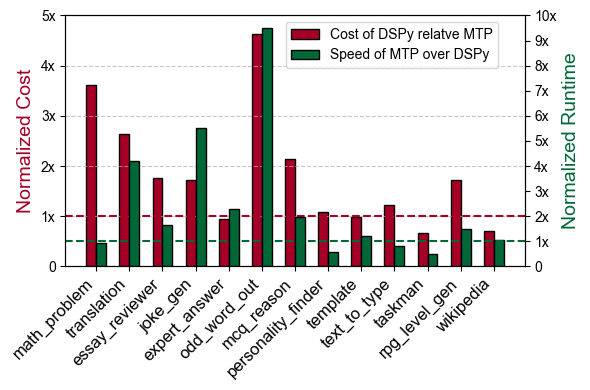

In [62]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial"]

# Assuming df_pivot_cost and df_pivot_runtime have already been created and contain the data

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(6, 4))


# Create x-axis labels
x = np.arange(len(benchmarks))  # Positions for the groups
width = 0.3  # Bar width

# Plotting the Cost on the left y-axis
ax1.bar(x - width/2, df_pivot_cost['Cost Difference'], width, label='Cost Difference', color=plt.cm.RdYlGn(0.0), edgecolor='black')

# Labeling the left y-axis
ax1.set_ylabel(r'Normalized Cost', color=plt.cm.RdYlGn(0.0),fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(benchmarks, rotation=45, ha='right', fontsize=12)
# Create a second y-axis for runtime using twinx
ax2 = ax1.twinx()

# Plotting the Runtime on the right y-axis
ax2.bar(x + width/2, df_pivot_runtime['Runtime Difference'], width, label='Runtime Difference', color=plt.cm.RdYlGn(1.0), edgecolor='black')

# Labeling the right y-axis
ax2.set_ylabel(r'Normalized Runtime', color=plt.cm.RdYlGn(1.0), fontsize=14)
# Adding a title and grid

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Create a combined legend for both axes
fig.legend(labels=[r'Cost of DSPy relatve MTP', r'Speed of MTP over DSPy'], fontsize=10, ncol=1, loc="upper right", bbox_to_anchor=(0.85, 0.95))
# Set custom ticks for the left y-axis (Cost Difference)
ax1.set_yticks(np.arange(0, max(df_pivot_cost['Cost Difference']) + 1, 1))  # Adjust the range and step size as needed

# Set custom ticks for the right y-axis (Runtime Difference)
ax2.set_yticks(np.arange(0, max(df_pivot_runtime['Runtime Difference']) + 1, 1),)  # Adjust the range and step size as needed
y_ticks = ax1.get_yticks()  # Get current y-tick locations
custom_labels = [(f'{int(i)}x' if int(i)!=0 else 0) for i in (y_ticks)]  # Create custom labels
ax1.set_yticklabels(custom_labels)  # Set new y-tick labels
y_ticks = ax2.get_yticks()  # Get current y-tick locations
custom_labels = [(f'{int(i)}x' if int(i)!=0 else 0) for i in (y_ticks)]  # Create custom labels
ax2.set_yticklabels(custom_labels)  # Set new y-tick labels

ax1.axhline(y=1, color=plt.cm.RdYlGn(0.0), linestyle='--')  # Adjust y-value and color
ax2.axhline(y=1, color=plt.cm.RdYlGn(1.0), linestyle='--')  # Adjust y-value and color

# Show plot
plt.tight_layout()
plt.show()
fig.savefig('cost_runtime_benchmarks.pdf', bbox_inches='tight')